In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(r'C:\Users\Me\Desktop\LabFinals\Labs\Lab10\CC GENERAL.csv')
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<bound method NDFrame.describe of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANC

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
features = [
    "BALANCE",
    "BALANCE_FREQUENCY",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "PURCHASES_FREQUENCY",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS",
    "PRC_FULL_PAYMENT",
    "TENURE"
]


In [11]:
df=df[features]

Correlation Matrix : 

                                  BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                             1.000              0.322      0.181   
BALANCE_FREQUENCY                   0.322              1.000      0.134   
PURCHASES                           0.181              0.134      1.000   
ONEOFF_PURCHASES                    0.164              0.104      0.917   
INSTALLMENTS_PURCHASES              0.126              0.124      0.680   
CASH_ADVANCE                        0.497              0.099     -0.051   
PURCHASES_FREQUENCY                -0.078              0.230      0.393   
ONEOFF_PURCHASES_FREQUENCY          0.073              0.202      0.498   
PURCHASES_INSTALLMENTS_FREQUENCY   -0.063              0.176      0.316   
CASH_ADVANCE_FREQUENCY              0.449              0.192     -0.120   
CASH_ADVANCE_TRX                    0.385              0.142     -0.067   
PURCHASES_TRX                       0.154              0.190      0.690   
CR

<Axes: >

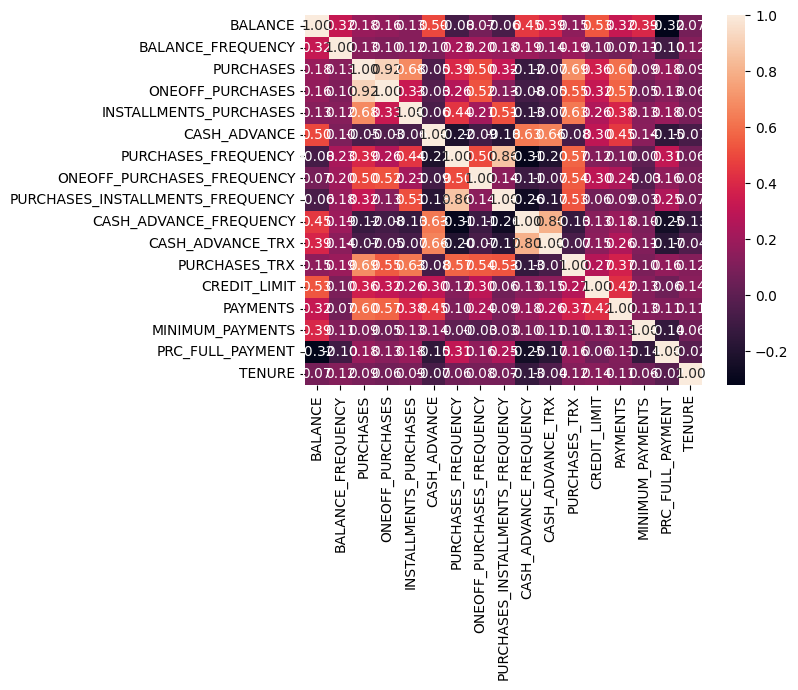

In [17]:
corr_matrix = df.corr()
print('Correlation Matrix : \n')
print(corr_matrix.round(3))
import seaborn as sns
sns.heatmap(corr_matrix,annot=True,fmt='.2f')

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

In [20]:
explained_var = pca.explained_variance_ratio_

In [21]:
print("\nExplained Variance Ratio per Component:")
for i, v in enumerate(explained_var, start=1):
    print(f"PC{i}: {v:.4f}")


Explained Variance Ratio per Component:
PC1: 0.2729
PC2: 0.2030
PC3: 0.0879
PC4: 0.0748
PC5: 0.0626
PC6: 0.0575
PC7: 0.0489
PC8: 0.0426
PC9: 0.0383
PC10: 0.0308
PC11: 0.0237
PC12: 0.0177
PC13: 0.0143
PC14: 0.0122
PC15: 0.0101
PC16: 0.0027
PC17: 0.0000


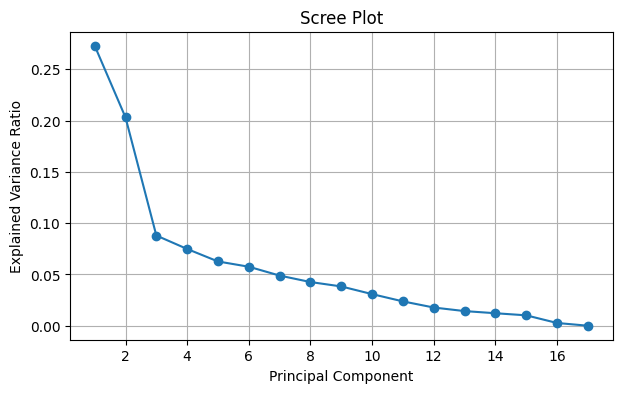

In [22]:
plt.figure(figsize=(7,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


In [25]:
import numpy as np
cum_var = np.cumsum(explained_var)
k = np.argmax(cum_var >= 0.90) + 1

print(f"\nComponents needed for 90% variance: {k}")
print("Cumulative variance:", cum_var[:k])


Components needed for 90% variance: 10
Cumulative variance: [0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517]


In [26]:
pca_final = PCA(n_components=k)
final_data = pca_final.fit_transform(df_scaled)

print("\nReduced Data (first 5 rows):")
print(final_data[:5])


Reduced Data (first 5 rows):
[[-1.68222026e+00 -1.07645061e+00 -4.88506522e-01  6.65551771e-01
  -1.82245295e-02 -5.06289264e-02 -8.29144414e-01 -3.93032122e-02
   1.15339545e-01  7.77742533e-02]
 [-1.13829490e+00  2.50647666e+00 -6.01212326e-01 -1.20437224e-01
  -6.05802878e-01  1.13684066e+00  3.74507027e-01  1.32410697e-01
   6.87877520e-01  7.77670992e-01]
 [ 9.69684015e-01 -3.83520301e-01 -1.02371379e-01  1.20926609e+00
   2.17258431e+00  2.17222464e-01  1.57325769e+00 -1.69548386e-01
  -8.83727488e-01  1.93865634e-03]
 [-8.73627730e-01  4.31656823e-02 -1.46016671e+00  1.15198005e+00
  -2.95631521e-01  1.23689015e-01  2.80759249e-01 -5.59098602e-01
  -1.46564027e-01 -3.93144116e-01]
 [-1.59943384e+00 -6.88580566e-01 -3.65093566e-01  9.90231641e-01
   4.87039079e-01 -7.50595716e-02 -7.07922607e-01  2.08398888e-01
   5.84619013e-01  1.21734150e-01]]


In [28]:
loadings = pd.DataFrame(
    pca_final.components_,
    columns=features,
    index=[f"PC{i+1}" for i in range(k)]
)
print("\nPCA Loadings (Feature Contribution to Each Component):\n")
print(loadings.round(3))


PCA Loadings (Feature Contribution to Each Component):

      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
PC1     0.101              0.120      0.412             0.346   
PC2     0.404              0.131      0.041             0.063   
PC3     0.160              0.421     -0.258            -0.392   
PC4     0.283              0.150      0.039             0.078   
PC5    -0.048              0.485     -0.031             0.156   
PC6    -0.040             -0.035     -0.176            -0.185   
PC7     0.252             -0.105     -0.203            -0.122   
PC8    -0.169              0.259      0.020             0.126   
PC9     0.130              0.621      0.105             0.018   
PC10   -0.031              0.081     -0.051             0.176   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
PC1                    0.337        -0.023                0.321   
PC2                   -0.019         0.439               -0.191   
PC3                    0.1